# Proyek Analisis Data: E-Commerce Public Dataset

- **Nama:** Bayu Pratama Putra 
- **Email:** mc476d5y0372@student.devacademy.id
- **Cohord ID:** MC476D5Y0372

# Menentukan Pertanyaan Bisnis

1. **Bagaimana tren jumlah pesanan dari waktu ke waktu?**
2. **Kategori produk apa yang paling banyak terjual?**
3. **Dari kota atau negara bagian mana pelanggan terbanyak berasal?**
4. **Kapan terakhir kali pelanggan melakukan transaksi?**
5. **Berapa rata-rata jumlah transaksi yang dilakukan per pelanggan?**
6. **Berapa rata-rata nilai transaksi per pelanggan?**

# Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
# Memuat tabel Customer
customer_df = pd.read_csv("data/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Memuat tabel Geolocation
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# Memuat tabel order_item
order_item_df = pd.read_csv("data/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Memuat tabel order_payment
order_payment_df = pd.read_csv("data/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Memuat tabel order_review
order_review_df = pd.read_csv("data/order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# Memuat tabel orders
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Memuat tabel product_category_name_translation
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# Memuat tabel products
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# Memuat tabel sellers
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Insight:
1. tabel customer berisikan alamat dan kode pelanggan
2. tabel geolocation berisikan hal hal terkait lokasi geografis
3. tabel order_item berisikan id dari order, product, seller juga harga, nilai barang dan batas waktu pengiriman
4. tabel order payment berisikan hal hal terkain pembayaran
5. tabel order_review berisikan hal hal menyangkut review pesanan dari pelanggan
6. tabel orders berisikan Jumlah total pesanan dalam dataset, Distribusi status pesanan (delivered, shipped, canceled, dll.), jugaWaktu rata-rata dari pembelian hingga pengiriman.
7. tabel product_category_name_translation berisikan kategori product dalam bahasa inggris
8. tabel product berisikan hal hal terkait produk yang dijual
9. table sellers berisikan alamat dan id dari sellers

## Assessing Data

### Data Customer

In [11]:
# Menilai Data customer_df
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
# memastikan missing value
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
# memeriksa parameter statistic dari kolom numerik
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Data Geolocation

In [15]:
# Menilai Data geolocation_df
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
# memastikan missing value
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [18]:
# memeriksa parameter statistic dari kolom numerik
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Data orders_item

In [19]:
# Menilai Data order_item_df
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
# memastikan missing value
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
# memeriksa parameter statistic dari kolom numerik
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Data order_payment

In [23]:
# Menilai Data order_payment_df
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
# memastikan missing value
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
# memeriksa parameter statistic dari kolom numerik
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Data order_review

In [27]:
# Menilai Data order_review_df
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
# memastikan missing value
order_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", order_review_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
# memeriksa parameter statistic dari kolom numerik
order_review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Data orders

In [31]:
# Menilai Data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
# memastikan missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
# memeriksa parameter statistic dari kolom numerik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Data product_category_name_translation

In [35]:
# Menilai Data product_category_name_translation_df
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
# memastikan missing value
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
# memeriksa parameter statistic dari kolom numerik
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Data products

In [39]:
# Menilai Data products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
# memastikan missing value
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
# memeriksa parameter statistic dari kolom numerik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Data sellers

In [43]:
# Menilai Data sellers_df
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
# memastikan missing value
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
# memeriksa parameter statistic dari kolom numerik
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### insight :
1. pada tabel geolocation terdapat 261831 duplikasi data
2. pada tabel order_item terdapat kesalahan tipe data pada kolom shipping_limit_date
3. pada table order_review terdapat missing value di kolom review_comment_title dan review_comment_message
4. pada table order_review terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp
5. pada tabel orders terdapat missing value di kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date
7. pada tabel orders terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date
8. pada tabel product terdapat missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm dan product_width_cm
9. pada tabel product terdapat inaccurate value di kolom product_weight_g karena tidak mungkin berat produk itu 0

## Cleaning Data

### Membersihkan data geolocation

In [47]:
# Menghilangkan duplikasi data
geolocation_df.drop_duplicates(inplace=True)

In [48]:
# memeriksa apakah masih terdapat duplikasi pada data
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


### Membersihkan data orders_item

In [49]:
# Mengganti tipe data pada kolom yang tidak sesuai
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_item_df[column] = pd.to_datetime(order_item_df[column])

In [50]:
# Cek kembali tipe data
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Membersihkan data order_review

In [51]:
# filtering data yang mengandung missing value pada kolom review_comment_title
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [52]:
# Mengganti missing value dengan '-' (karena missing value hanya pada kolom judul dan pesan komentar)
order_review_df.fillna(value="-", inplace=True)

In [53]:
# Identifikasi kembali missing value
order_review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [54]:
# Mengganti tipe data pada kolom yang tidak sesuai
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

In [55]:
# Cek kembali tipe data
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### Membersihkan data orders

In [56]:
# Mengganti tipe data pada kolom yang tidak sesuai
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [57]:
# Cek kembali tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [58]:
# Mengisi order_approved_at dengan order_purchase_timestamp (karena pesanan biasanya disetujui tak lama setelah pembelian)
# Mengisi order_delivered_carrier_date dengan order_purchase_timestamp + estimasi waktu pengiriman standar
# Mengisi order_delivered_customer_date dengan order_estimated_delivery_date

# rata rata waktu pengiriman
median_delivery_time = (orders_df['order_delivered_carrier_date'] - orders_df['order_purchase_timestamp']).dt.days.median()
orders_df.fillna({
    'order_approved_at': orders_df['order_purchase_timestamp'],
    'order_delivered_carrier_date': orders_df['order_purchase_timestamp']+ pd.to_timedelta(median_delivery_time, unit='D'),
    'order_delivered_customer_date': orders_df['order_estimated_delivery_date']
}, inplace=True)

In [59]:
# Identifikasi kembali missing value
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Membersihkan data Product

In [60]:
# filtering data yang memiliki missing value pada kolom product_category_name
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [61]:
# isi missing value pada product_category_name dengan unknown
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')

# isi missing value pada product_name_lenght, product_description_length, dan product_photos_qty dengan mediannya
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

In [62]:
# filtering data yang memiliki missing value pada kolom product_weight_g
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,unknown,51.0,595.0,1.0,NaN,NaN,NaN,NaN


In [63]:
# isi missing value pada product_weight_g, product_length_cm, product_height_cm dan product_width_cm dengan mediannya
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].median())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].median())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].median())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].median())

In [64]:
# Identifikasi kembali missing value
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [65]:
# ganti inaccurate value pada product_weight_g dengan mediannya
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = products_df['product_weight_g'].median()

### Insight :
1. duplikasi data pada geolocation perlu dihapus
2. penggantian tipe data pada beberapa kolom pada data yang tidak sesuai
3. Mengisi missing value pada Data order_review dengan - (karena data dengan missing value hanya komentar)
4. Mengisi missing value order_approved_at dengan order_purchase_timestamp pada data orders(karena pesanan biasanya disetujui tak lama setelah pembelian)
5. Mengisi missing value order_delivered_carrier_date dengan order_purchase_timestamp + estimasi waktu pengiriman standar pada data orders
6. Mengisi missing value order_delivered_customer_date dengan order_estimated_delivery_date pada data orders
7. Mengisi missing value pada product_category_name dengan unknown pada Data products
8. Mengisi missing value kolom yang bersifat numerik dengan mediannya pada Data products

# Exploratory Data Analysis (EDA)

## Explorasi data customer_df

In [66]:
# melihat rangkuman parameter statistik dari data customer_df
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [67]:
# Melihat demografi pelanggan berdasarkan city menggunakan pivot table
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [68]:
# Melihat demografi pelanggan berdasarkan state menggunakan pivot table
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Insight :
1. Terlihat bahwa customer/pelanggan terbanyak terdapat pada kota Sao Paulo dengan total pelanggan mencapai 15540 pelanggan
2. Terlihat bahwa customer/pelanggan terbanyak terdapat pada Negara bagian/State SP(Sao Paulo) dengan pelanggan mencapai 41746 pelanggan

## Eksplorasi data order_item_df

In [69]:
# melihat rangkuman parameter statistik dari data order_item_df
order_item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [70]:
# Menyatukan (merge) tabel products_df dan order_item_df agar mendapat kategori produk dari yang paling banyak terjual
order_item_products_df = order_item_df.merge(products_df, on="product_id", how="left")
order_item_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [71]:
# Menampilkan kategori produk dari yang paling banyak terjual
order_item_products_df.groupby(by='product_category_name').agg({
    "order_id": "count"
}).sort_values(by="order_id",ascending=False)

,order_id
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


### Insight :
1. Dapat dilihat bahwa kategori produk paling banyak diorder/terjual adalah cama_mesa_banho dengan penjualan sebanyak 11115 produk

## Eksplorasi data orders_df

In [72]:
# melihat rangkuman parameter statistik dari data orders_df
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 13:48:22.964793344,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-07 00:15:34,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:29:30,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 17:13:41,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 09:09:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-19 17:30:18,2018-11-12 00:00:00,2018-11-12 00:00:00


In [73]:
# Membuat kolom pembelian/order perbulan
orders_df['order_purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month
83410,11526907a9d9e94078d44fb1c4abb4ec,16c9179622cbd53ac83895bd09ea73c2,delivered,2018-08-08 00:56:34,2018-08-09 03:45:28,2018-08-09 20:33:00,2018-08-23 01:35:45,2018-08-20,2018-08
92419,5bbc94ad182b8b20ea955b1c3cae7d60,89fcf5e5b0b9a32db1cadbcc8c3eec9a,delivered,2017-09-11 17:47:24,2017-09-11 17:55:16,2017-09-12 21:54:46,2017-09-22 17:59:33,2017-10-04,2017-09
94394,0b03fa2615b44079dad6c958f0ef2a02,e736f5ed99e8006c42053a398381a116,delivered,2017-11-28 22:48:51,2017-11-28 22:57:16,2017-11-29 17:17:59,2017-12-02 15:58:43,2017-12-12,2017-11
5060,bab61aa88a055fe040e8868a7507921b,d0a2850b99e417938439abb2074bbb67,delivered,2017-06-29 21:22:46,2017-06-29 21:35:13,2017-07-03 10:42:09,2017-07-04 16:27:30,2017-07-12,2017-06
37994,694abc031584656b8a62d393c72ed05d,ba45b24196899d79381424d0ca7c7ea6,delivered,2018-05-09 18:07:02,2018-05-09 18:32:34,2018-05-24 11:22:00,2018-05-28 17:02:23,2018-06-01,2018-05


In [74]:
# Melihat jumlah order perbulan
orders_df.groupby(by="order_purchase_month").agg({
    "order_id": "count"
}).sort_values(by="order_id", ascending=False)

,order_id
order_purchase_month,
2017-11,7544
2018-01,7269
2018-03,7211
2018-04,6939
2018-05,6873
2018-02,6728
2018-08,6512
2018-07,6292
2018-06,6167


### Insight :
1. Dapat dilihat bahwa data menampilkan tren jumlah pesanan dari waktu ke waktu dengan urutan dari yang terlama

## Eksplorasi Data all_df

### Membuat all_df dari gabungan seluruh tabel

In [75]:
# Membuat geolocation_unique
geolocation_unique = geolocation_df.groupby("geolocation_zip_code_prefix").agg({
    "geolocation_lat": "median",   # Ambil median koordinat lokasi
    "geolocation_lng": "median"
}).reset_index()

# Gabungkan customer dengan geolocation tanpa menduplikasi customer
customer_geo_df = customer_df.merge(geolocation_unique, 
                                      left_on="customer_zip_code_prefix", 
                                      right_on="geolocation_zip_code_prefix", 
                                      how="left")
# Gabungkan sellers dengan geolocation tanpa menduplikasi sellers
sellers_geo_df = sellers_df.merge(geolocation_unique, 
                                  left_on="seller_zip_code_prefix", 
                                  right_on="geolocation_zip_code_prefix", 
                                  how="left")

# Hapus kolom geolocation_zip_code_prefix dari hasil merge customer
customer_geo_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)

# Hapus kolom geolocation_zip_code_prefix dari hasil merge seller
sellers_geo_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)


In [76]:
# Menggabungkan data pesanan dengan ulasan
all_df = orders_df.merge(order_review_df[['order_id', 'review_score']], on='order_id', how='left')

# Gabungkan dengan order_item_products_df
all_df = all_df.merge(order_item_products_df, on="order_id", how="left")

# Gabungkan dengan order_payment_df
all_df = all_df.merge(order_payment_df, on="order_id", how="left")

# Gabungkan dengan customers_geo_df
all_df = all_df.merge(customer_geo_df, on="customer_id", how="left")

# Gabungkan dengan sellers_geo_df
all_df = all_df.merge(sellers_geo_df, on="seller_id", how="left")

# Gabungkan dengan product_category_name_df
all_df = all_df.merge(product_category_name_translation_df, on="product_category_name", how="left")

In [77]:
# Menghitung total pembayaran per pesanan (aggregate sebelum merge)
order_payment_summary = order_payment_df.groupby("order_id", as_index=False).agg({
    "payment_value": "sum"
})

# Lalu baru merge dengan order_payment_summary
all_df = all_df.merge(order_payment_summary, on="order_id", how="left")

### Eksplorasi data all_df

In [78]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 6   order_delivered_customer_date  119143 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_purchase_month           119143 non-null  period[M]     
 9   review_score                   118146 non-null  float64       
 10  order_item_id                  118310 non-null  float64       
 11  

In [79]:
# Mengetahui kapan pelanggan terakhir kali melakukan transaksi
last_transaction = all_df.groupby("customer_id").agg({
    "order_purchase_timestamp": "min"
})

# Urutkan berdasarkan tanggal transaksi terakhir dari terbaru ke terlama
last_transaction = last_transaction.sort_values(by="order_purchase_timestamp", ascending=False)

last_transaction.head(10)

,order_purchase_timestamp
customer_id,
a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:18
856336203359aa6a61bf3826f7d84c49,2018-10-16 20:16:02
4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:29
bf6181a85bbb4115736c0a8db1a53be3,2018-10-01 15:30:09
2823ffda607a2316375088e0d00005ec,2018-09-29 09:13:03
55c9dad94ec1a2ba57998bdb376c230a,2018-09-26 08:40:15
7a8a02e54cf3472df427e927f8b9c046,2018-09-25 11:59:18
191984a8ba4cbb2145acb4fe35b69664,2018-09-20 13:54:16
ad2eb5d02c0808bcd8743117f6383cf6,2018-09-17 17:21:16


In [80]:
# Mengetahui berapa rata rata jumlah transaksi per pelanggan
transaction_count = all_df.groupby("customer_id").agg({
    "order_id": "count"
})

avg_transactions_per_customer = transaction_count["order_id"].mean()
print(avg_transactions_per_customer)

1.1981275329089611


In [81]:
# Mengetahui rata-rata nilai transaksi per pelanggan
customer_spending = all_df.groupby("customer_id").agg({
    "payment_value_x": "sum"
})

avg_spending_per_customer = customer_spending["payment_value_x"].mean()
print(avg_spending_per_customer)

206.95351022214174


## Insight : 
1. Terlihat bahwa customer/pelanggan terbanyak terdapat pada kota Sao Paulo dengan total pelanggan mencapai 15540 pelanggan
2. Terlihat bahwa customer/pelanggan terbanyak terdapat pada Negara bagian/State SP(Sao Paulo) dengan pelanggan mencapai 41746 pelanggan
3. Dapat dilihat bahwa kategori produk paling banyak diorder/terjual adalah cama_mesa_banho dengan penjualan sebanyak 11115 produk
4. Didapat bahwa rata rata nilai transaksi per pesanan adalah 161 (dibulatkan)
5. Dapat dilihat bahwa tren jumlah pesanan dari waktu ke waktu terkadang naik atau turun
6. Didapat terakhir kali pelanggan melakukan transaksi adalah pada 2018-10-17
7. Didapat bahwa rata rata jumlah transaksi per pelanggan adalah 1,19 transaksi
8. Didapat bahwa rata rata nilai transaksi per pelanggan adalah senilai 206,95

# Visualization & Explanatory Analysis

## Bagaimana tren jumlah pesanan dari waktu ke waktu?

In [82]:
# Merubah kolom order_purchase_month yang sebelumya Period ke Datetime
all_df["order_purchase_month"] = all_df["order_purchase_month"].dt.to_timestamp()

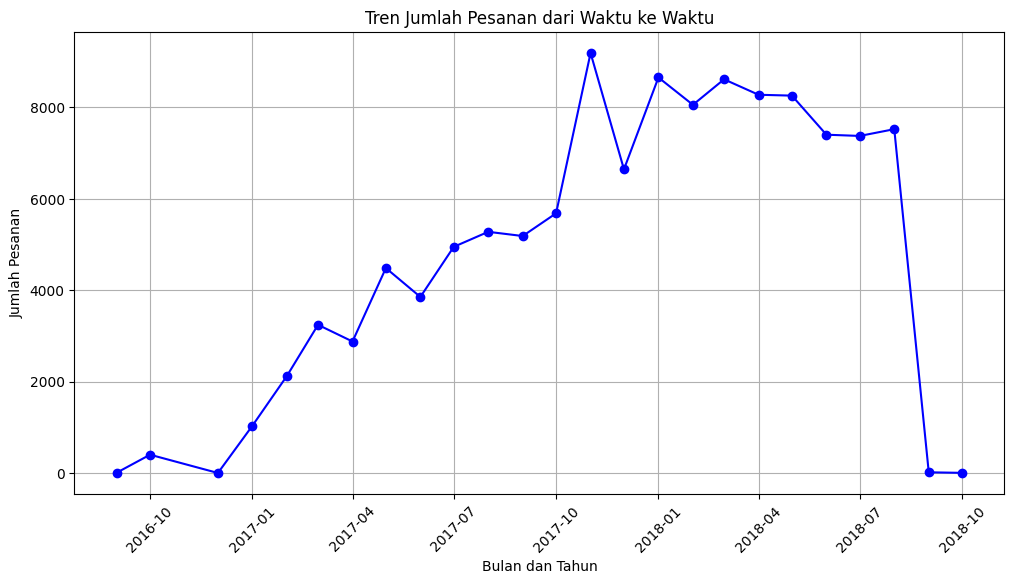

In [83]:
# Kelompokkan jumlah pesanan per bulan
order_trend = all_df.groupby("order_purchase_month")["order_id"].count()

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(order_trend.index, order_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Jumlah Pesanan dari Waktu ke Waktu")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Kategori produk apa yang paling banyak terjual?

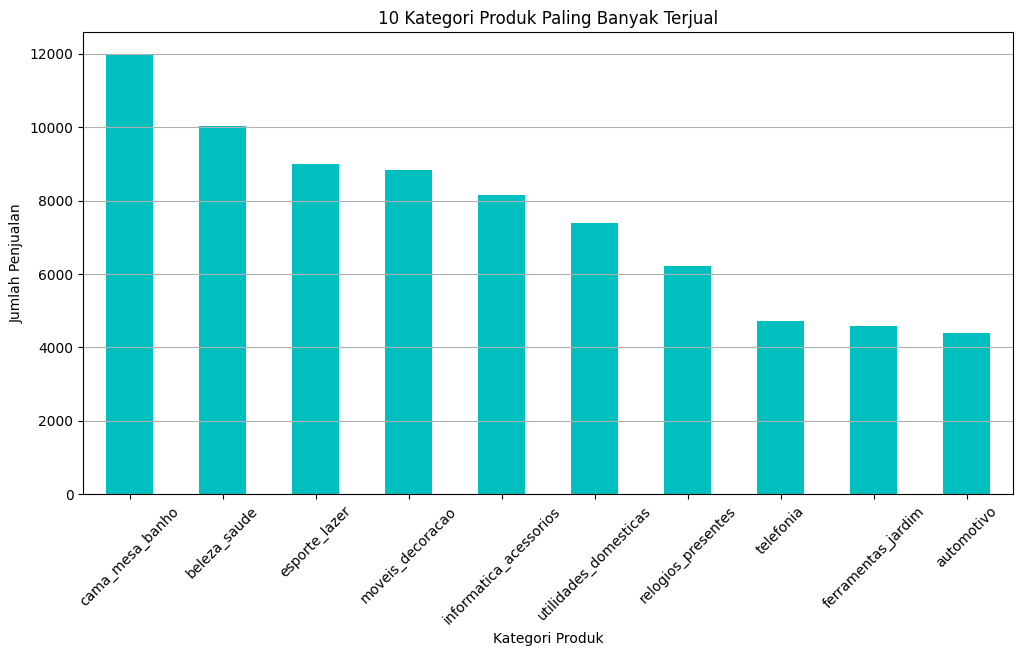

In [84]:
# Mengelompokkan jumlah penjualan per kategori
top_categories = all_df.groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)

# Plot data
plt.figure(figsize=(12, 6))
top_categories.plot(kind="bar", color="c")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Penjualan")
plt.title("10 Kategori Produk Paling Banyak Terjual")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

## Dari kota atau negara bagian mana pelanggan terbanyak berasal?

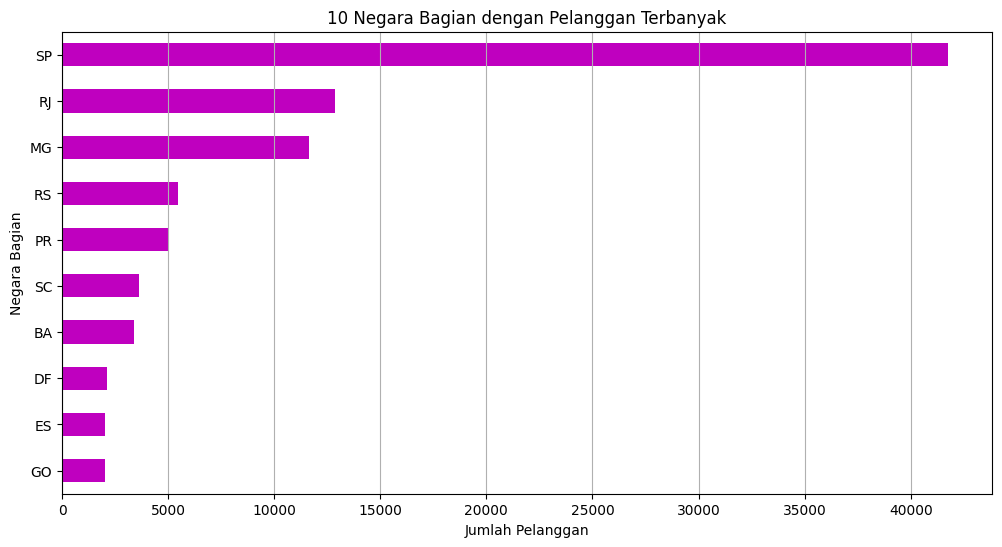

In [85]:
# Mengelompokkan jumlah pelanggan berdasarkan negara bagian
top_states = all_df.groupby("customer_state")["customer_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan horizontal bar chart
plt.figure(figsize=(12, 6))
top_states.plot(kind="barh", color="m")
plt.ylabel("Negara Bagian")
plt.xlabel("Jumlah Pelanggan")
plt.title("10 Negara Bagian dengan Pelanggan Terbanyak")
plt.gca().invert_yaxis()
plt.grid(axis="x")
plt.show()

## Insight :
1. Didapat bahwa tren jumlah pesanan melonjak di bulan oktober 2017 dan turun drastis di Agustus 2018
2. Didapat kategori produk paling laris adalah cama_mesa_banho
3. Didapat bahwa pelanggan paling banyak berasal dari state SP(San Paulo)

# Analisis Lanjutan (RFM analysis)

In [86]:
#Tiga pertanyaan terakhir dapat menggunakan RFM Analysis

In [87]:
# Gabungkan semua metrik ke dalam satu DataFrame
rfm_df = all_df.groupby("customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Recency
    "order_id": "count",  # Frequency
    "payment_value_x": "sum"  # Monetary
})

rfm_df.columns = ["customer_id", "order_purchase_timestamp", "frequency", "monetary"]

# Hitung Recency
latest_date = all_df["order_purchase_timestamp"].max()
rfm_df["recency"] = (latest_date - rfm_df["order_purchase_timestamp"]).dt.days

# Drop kolom order_purchase_timestamp pada rfm_df karena sudah tidak gunakan lagi
rfm_df.drop("order_purchase_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


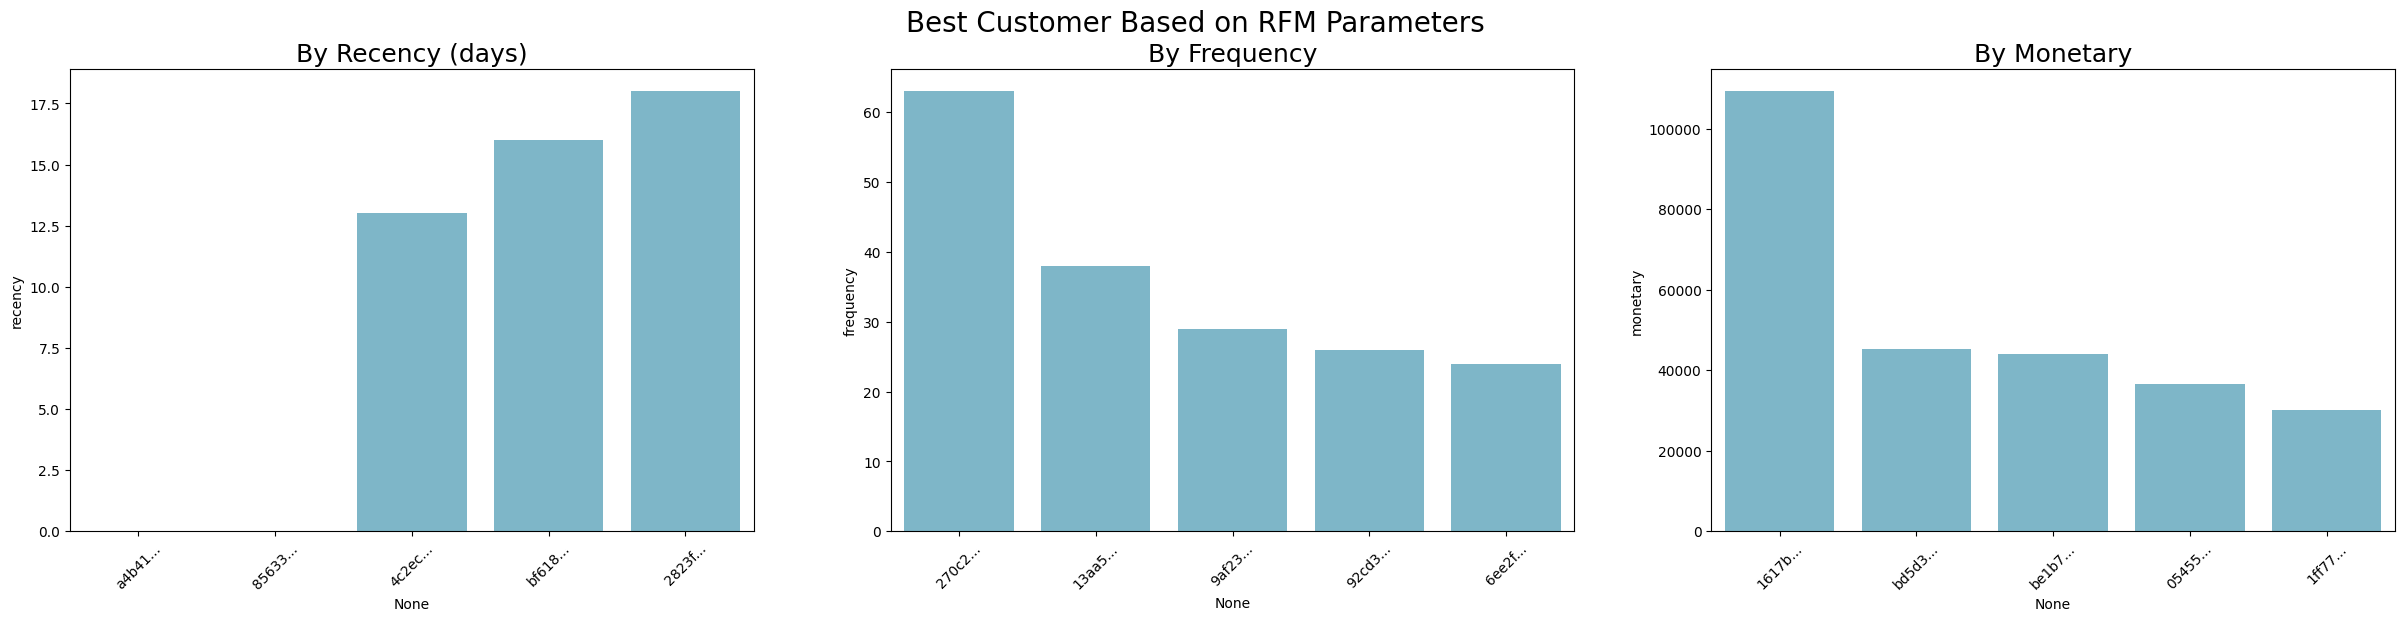

In [88]:
# Visualisasi Distribusi RFM dalam bentuk histogram

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4"] * 5  # Warna untuk barplot

# Recency
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5).reset_index()
sns.barplot(y="recency", x=top_recency.index, hue=top_recency.index, data=top_recency, palette=colors, ax=ax[0], legend=False)
ax[0].set_xticks(top_recency.index)
ax[0].set_xticklabels(top_recency["customer_id"].str[:5] + "...", rotation=45)  # Potong ID agar lebih pendek
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)

# Frequency
top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5).reset_index()
sns.barplot(y="frequency", x=top_frequency.index, hue=top_frequency.index, data=top_frequency, palette=colors, ax=ax[1], legend=False)
ax[1].set_xticks(top_frequency.index)
ax[1].set_xticklabels(top_frequency["customer_id"].str[:5] + "...", rotation=45)
ax[1].set_title("By Frequency", loc="center", fontsize=18)

# Monetary
top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5).reset_index()
sns.barplot(y="monetary", x=top_monetary.index, hue=top_monetary.index, data=top_monetary, palette=colors, ax=ax[2], legend=False)
ax[2].set_xticks(top_monetary.index)
ax[2].set_xticklabels(top_monetary["customer_id"].str[:5] + "...", rotation=45)
ax[2].set_title("By Monetary", loc="center", fontsize=18)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

## Insight : 
1. Pelanggan dengan nilai Recency rendah berarti mereka baru saja melakukan transaksi
2. Pelanggan dengan Frequency tinggi adalah pelanggan setia yang sering berbelanja
3. Pelanggan dengan Monetary tinggi adalah high-value customers yang mengeluarkan banyak uang

# Conclusion

In [90]:
all_df.to_csv("dashboard/main_data.csv", index=False)